<a href="https://www.vivaair.com"><img src = "https://upload.wikimedia.org/wikipedia/commons/a/a1/Logosvivaair_Mesa-de-trabajo-1.png" width = 250, align = "Right"></a>

# Fuel Policy / Analytics - OCC
    
***

    
### Descripción:
Este Notebook tiene como objetivo consolidar la pólitica de consumo de combustible para la aerolínea <a href="www.vivaair.com">Viva Air </a> teniendo en cuenta algoritmos de clasificación y de predicción basados en técnicas de machine learning




In [1]:
#Librerias a utilizar

import warnings; warnings.simplefilter('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os, shutil, datetime

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Lectura de archivo Master
Master=pd.read_excel("Master Data Base - Viva Air Models.xlsx").iloc[:,1:]
Master.head()

,Add Fuel Dummy,Add Fuel Label,Add Fuel,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time
0,1,500,448.045758,441.539455,8980,108.0,5.758462,69.0,188,28.0,7.0,6.21,1400,1,1,0,0
1,1,200,200.000000,285.117336,5280,103.0,4.905819,44.0,188,12.0,6.0,6.21,1700,1,1,0,0
2,1,100,97.276265,951.931563,7630,61.0,6.443030,90.0,132,2.0,1.0,6.21,3000,0,1,0,0
3,0,0,0.000000,978.509750,8120,63.0,1.833962,12.0,135,17.0,2.0,6.21,5000,0,1,0,0
4,1,100,29.013540,1055.309470,9380,65.0,3.663671,55.0,156,10.0,7.0,6.21,13000,0,1,0,0


In [3]:
CopyMaster=Master.copy()

In [4]:
Master.columns

Index(['Add Fuel Dummy', 'Add Fuel Label', 'Add Fuel', 'Fuel Burn std',
       'Fuel Burn Range', 'Flight Time', 'Flight Time std',
       'Flight Time Range', 'Pax', 'Temperature', 'Wind', 'H Vsby', 'V Vsby',
       'VVC', 'New AC', 'Fog-Brume', 'Long Flight Time'],
      dtype='object')

In [5]:
#Check missing data

missing_data = Master.isnull()

for column in Master.columns[Master.isnull().any()].tolist():
    print (missing_data[column].value_counts())

In [6]:
def Interaction(a,b):
    for i in a:
        for j in b:
            if i==j:
                Master_[i+"^2"]=Master_[i]**2
            else:
                Master_[i+"_"+j]=Master_[i]*Master_[j]

In [7]:

#Interactions

Master_=Master.copy()

Con=['Fuel Burn std','Fuel Burn Range','Flight Time','Flight Time std','Flight Time Range','Pax',
     'Temperature','Wind','H Vsby','V Vsby']

Cat=['VVC','New AC','Fog-Brume','Long Flight Time']

Interaction(Con,Cat)

Master_=Master_[Master_['Add Fuel Dummy']>0]

X=Master_.iloc[:,3:]
y1=Master_.iloc[:,0]
y2=Master_.iloc[:,1]
y3=Master_.iloc[:,2]

Master_.head()

,Add Fuel Dummy,Add Fuel Label,Add Fuel,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time,Fuel Burn std_VVC,Fuel Burn std_New AC,Fuel Burn std_Fog-Brume,Fuel Burn std_Long Flight Time,Fuel Burn Range_VVC,Fuel Burn Range_New AC,Fuel Burn Range_Fog-Brume,Fuel Burn Range_Long Flight Time,Flight Time_VVC,Flight Time_New AC,Flight Time_Fog-Brume,Flight Time_Long Flight Time,Flight Time std_VVC,Flight Time std_New AC,Flight Time std_Fog-Brume,Flight Time std_Long Flight Time,Flight Time Range_VVC,Flight Time Range_New AC,Flight Time Range_Fog-Brume,Flight Time Range_Long Flight Time,Pax_VVC,Pax_New AC,Pax_Fog-Brume,Pax_Long Flight Time,Temperature_VVC,Temperature_New AC,Temperature_Fog-Brume,Temperature_Long Flight Time,Wind_VVC,Wind_New AC,Wind_Fog-Brume,Wind_Long Flight Time,H Vsby_VVC,H Vsby_New AC,H Vsby_Fog-Brume,H Vsby_Long Flight Time,V Vsby_VVC,V Vsby_New AC,V Vsby_Fog-Brume,V Vsby_Long Flight Time
0,1,500,448.045758,441.539455,8980,108.0,5.758462,69.0,188,28.0,7.0,6.21,1400,1,1,0,0,441.539455,441.539455,0.000000,0.0,8980,8980,0,0,108.0,108.0,0.0,0.0,5.758462,5.758462,0.000000,0.0,69.0,69.0,0.0,0.0,188,188,0,0,28.0,28.0,0.0,0.0,7.0,7.0,0.0,0.0,6.21,6.21,0.00,0.0,1400,1400,0,0
1,1,200,200.000000,285.117336,5280,103.0,4.905819,44.0,188,12.0,6.0,6.21,1700,1,1,0,0,285.117336,285.117336,0.000000,0.0,5280,5280,0,0,103.0,103.0,0.0,0.0,4.905819,4.905819,0.000000,0.0,44.0,44.0,0.0,0.0,188,188,0,0,12.0,12.0,0.0,0.0,6.0,6.0,0.0,0.0,6.21,6.21,0.00,0.0,1700,1700,0,0
2,1,100,97.276265,951.931563,7630,61.0,6.443030,90.0,132,2.0,1.0,6.21,3000,0,1,0,0,0.000000,951.931563,0.000000,0.0,0,7630,0,0,0.0,61.0,0.0,0.0,0.000000,6.443030,0.000000,0.0,0.0,90.0,0.0,0.0,0,132,0,0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,6.21,0.00,0.0,0,3000,0,0
4,1,100,29.013540,1055.309470,9380,65.0,3.663671,55.0,156,10.0,7.0,6.21,13000,0,1,0,0,0.000000,1055.309470,0.000000,0.0,0,9380,0,0,0.0,65.0,0.0,0.0,0.000000,3.663671,0.000000,0.0,0.0,55.0,0.0,0.0,0,156,0,0,0.0,10.0,0.0,0.0,0.0,7.0,0.0,0.0,0.00,6.21,0.00,0.0,0,13000,0,0
5,1,100,58.252427,270.058326,5500,66.0,4.708574,59.0,152,26.0,5.0,3.73,1000,1,1,1,0,270.058326,270.058326,270.058326,0.0,5500,5500,5500,0,66.0,66.0,66.0,0.0,4.708574,4.708574,4.708574,0.0,59.0,59.0,59.0,0.0,152,152,152,0,26.0,26.0,26.0,0.0,5.0,5.0,5.0,0.0,3.73,3.73,3.73,0.0,1000,1000,1000,0


In [8]:
Master_.columns

Index(['Add Fuel Dummy', 'Add Fuel Label', 'Add Fuel', 'Fuel Burn std',
       'Fuel Burn Range', 'Flight Time', 'Flight Time std',
       'Flight Time Range', 'Pax', 'Temperature', 'Wind', 'H Vsby', 'V Vsby',
       'VVC', 'New AC', 'Fog-Brume', 'Long Flight Time', 'Fuel Burn std_VVC',
       'Fuel Burn std_New AC', 'Fuel Burn std_Fog-Brume',
       'Fuel Burn std_Long Flight Time', 'Fuel Burn Range_VVC',
       'Fuel Burn Range_New AC', 'Fuel Burn Range_Fog-Brume',
       'Fuel Burn Range_Long Flight Time', 'Flight Time_VVC',
       'Flight Time_New AC', 'Flight Time_Fog-Brume',
       'Flight Time_Long Flight Time', 'Flight Time std_VVC',
       'Flight Time std_New AC', 'Flight Time std_Fog-Brume',
       'Flight Time std_Long Flight Time', 'Flight Time Range_VVC',
       'Flight Time Range_New AC', 'Flight Time Range_Fog-Brume',
       'Flight Time Range_Long Flight Time', 'Pax_VVC', 'Pax_New AC',
       'Pax_Fog-Brume', 'Pax_Long Flight Time', 'Temperature_VVC',
       'Temperatu

In [9]:
y1=y2

In [10]:
Master_.shape

(14088, 57)

# Prediction Algorithms

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)

In [13]:
reg=KNeighborsRegressor(n_neighbors=20)
reg = reg.fit(X_train,y1_train)
yhat_=reg.predict(X_test)
print('KNN',r2_score(y1_test, yhat_))

KNN 0.29806270860668216


In [14]:
reg=LinearRegression()
reg = reg.fit(X_train,y1_train)
yhat_=reg.predict(X_test)
print('LR',r2_score(y1_test, yhat_))

LR 0.2583727523016126


In [15]:
reg=LinearRegression()
reg = reg.fit(X_train,y1_train)
yhat_=reg.predict(X_train)
print('LR',r2_score(y1_train, yhat_))

LR 0.27116651177140194


In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
endog = y1_train
exog = sm.add_constant(X_train)
model=sm.OLS(endog,exog)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Add Fuel Label   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     72.42
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:25:01   Log-Likelihood:                -64458.
No. Observations:               10566   AIC:                         1.290e+05
Df Residuals:                   10511   BIC:                         1.294e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Se descarta las técnicas de regresion, dado que el desempeño es bastante bajo

# Classification Algorithms

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [19]:
#Interactions

Master_=Master.copy()

#Con=['Fuel Burn std','Fuel Burn Range','Flight Time','Flight Time std','Flight Time Range','Pax',
#     'Temperature','Wind','H Vsby','V Vsby']

#Cat=['VVC','New AC','Fog-Brume','Long Flight Time']


Con=['Flight Time','Flight Time std','Flight Time Range']
Cat=['VVC','New AC','Long Flight Time']

Interaction(Con,Cat)

Con=['Flight Time','Temperature','Wind','H Vsby','V Vsby']
Cat=['Fog-Brume']

Interaction(Con,Cat)

Master_=Master_[Master_['Add Fuel Dummy']>0]

X=Master_.iloc[:,3:]
y1=Master_.iloc[:,0]
y2=Master_.iloc[:,1]
y3=Master_.iloc[:,2]

Master_.head()

,Add Fuel Dummy,Add Fuel Label,Add Fuel,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time,Flight Time_VVC,Flight Time_New AC,Flight Time_Long Flight Time,Flight Time std_VVC,Flight Time std_New AC,Flight Time std_Long Flight Time,Flight Time Range_VVC,Flight Time Range_New AC,Flight Time Range_Long Flight Time,Flight Time_Fog-Brume,Temperature_Fog-Brume,Wind_Fog-Brume,H Vsby_Fog-Brume,V Vsby_Fog-Brume
0,1,500,448.045758,441.539455,8980,108.0,5.758462,69.0,188,28.0,7.0,6.21,1400,1,1,0,0,108.0,108.0,0.0,5.758462,5.758462,0.0,69.0,69.0,0.0,0.0,0.0,0.0,0.00,0
1,1,200,200.000000,285.117336,5280,103.0,4.905819,44.0,188,12.0,6.0,6.21,1700,1,1,0,0,103.0,103.0,0.0,4.905819,4.905819,0.0,44.0,44.0,0.0,0.0,0.0,0.0,0.00,0
2,1,100,97.276265,951.931563,7630,61.0,6.443030,90.0,132,2.0,1.0,6.21,3000,0,1,0,0,0.0,61.0,0.0,0.000000,6.443030,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.00,0
4,1,100,29.013540,1055.309470,9380,65.0,3.663671,55.0,156,10.0,7.0,6.21,13000,0,1,0,0,0.0,65.0,0.0,0.000000,3.663671,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.00,0
5,1,100,58.252427,270.058326,5500,66.0,4.708574,59.0,152,26.0,5.0,3.73,1000,1,1,1,0,66.0,66.0,0.0,4.708574,4.708574,0.0,59.0,59.0,0.0,66.0,26.0,5.0,3.73,1000


In [20]:
y1=y2

In [21]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
print ('Train set:', X_train.shape,  y1_train.shape)
print ('Test set:', X_test.shape,  y1_test.shape)

Train set: (10566, 28) (10566,)
Test set: (3522, 28) (3522,)


In [22]:
def Confusion(y,y_hat,model='Classification',save=True):
    
    #Confusion Matrix

    d={'y':y,'y_Pred':y_hat}
    df = pd.DataFrame(d)

    print("Test data:",df.shape[0])

    confusion_matrix = pd.crosstab(df['y'], df['y_Pred'], rownames=['Actual Add Fuel (kg)'], colnames=['Predicted Add Fuel (kg)'])

    plt.figure(figsize=(5,4))
    plt.title("Confusion Matrix "+model)
    sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGn")
    if save==True:
        my_file='Confusion matrix '+model+'.png'
        dir2=os.getcwd()+"/Classification Models/"+model 
        plt.savefig(os.path.join(dir2, my_file))

In [23]:
def scal(type_scaler='No'):
    if type_scaler=='No':
        X_train_scaled = X_train
        X_test_scaled = X_test
    elif type_scaler=='Min Max':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    elif type_scaler=='Standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

def translate_scal(type_scaler):
    if type_scaler=='Min Max':
        return ('scaler', MinMaxScaler())
    elif type_scaler=='Standard':
        return ('scaler', StandardScaler())

In [24]:
#Pipelines / Best classification models

clf={}

# Neural Network

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [25]:
from sklearn.neural_network import MLPClassifier

Scaler:  No
Layer(s):  1
Activation:  logistic
The best accuracy was  0.4679 with  50  nodes and  logistic  activation


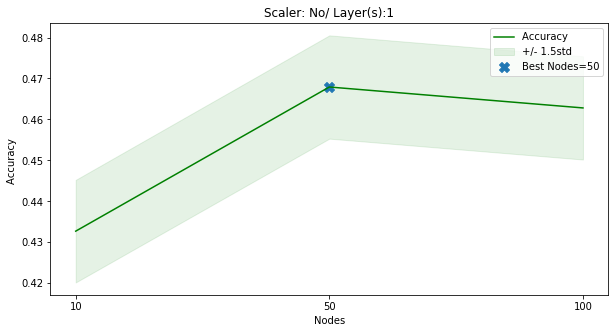

Scaler:  Min Max
Layer(s):  1
Activation:  logistic
The best accuracy was  0.5034 with  10  nodes and  logistic  activation


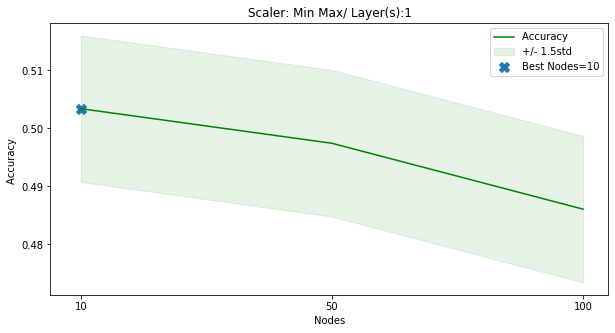

Scaler:  Standard
Layer(s):  1
Activation:  logistic
The best accuracy was  0.5273 with  50  nodes and  logistic  activation


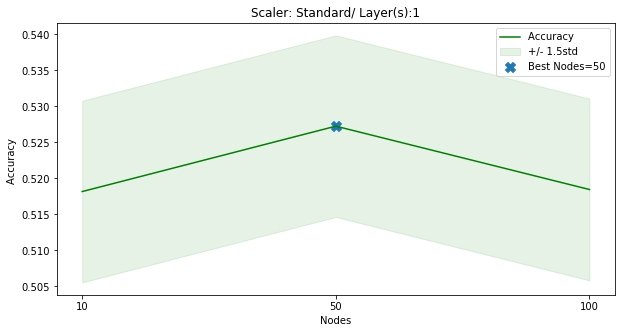

Scaler:  No
Layer(s):  1
Activation:  tanh
The best accuracy was  0.433 with  50  nodes and  tanh  activation


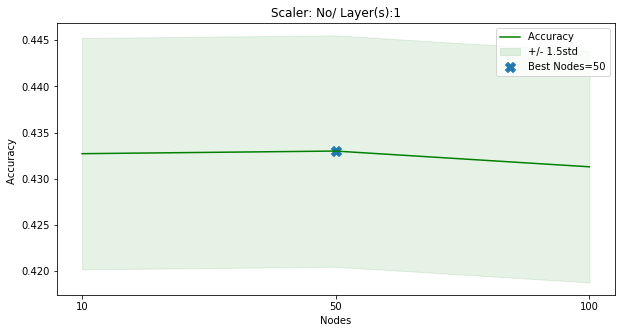

Scaler:  Min Max
Layer(s):  1
Activation:  tanh
The best accuracy was  0.508 with  10  nodes and  tanh  activation


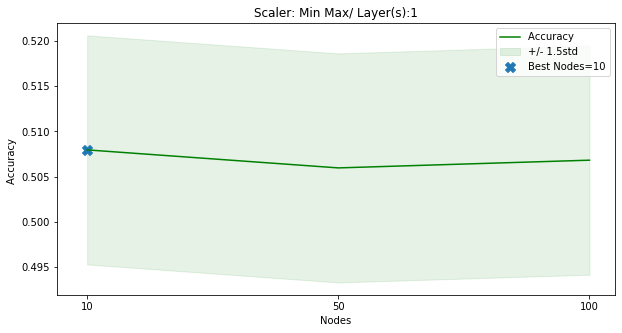

Scaler:  Standard
Layer(s):  1
Activation:  tanh
The best accuracy was  0.5361 with  50  nodes and  tanh  activation


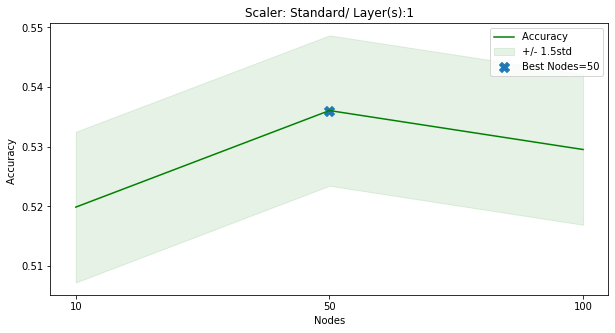

Scaler:  No
Layer(s):  1
Activation:  relu
The best accuracy was  0.429 with  50  nodes and  relu  activation


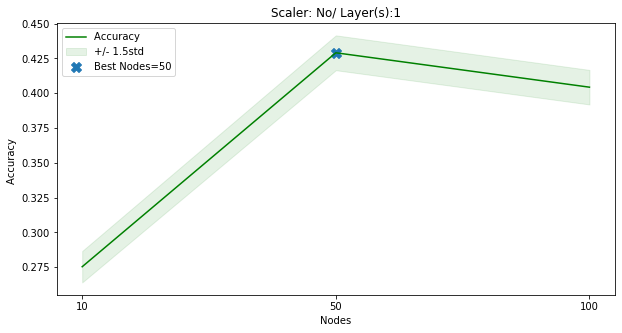

Scaler:  Min Max
Layer(s):  1
Activation:  relu
The best accuracy was  0.5136 with  100  nodes and  relu  activation


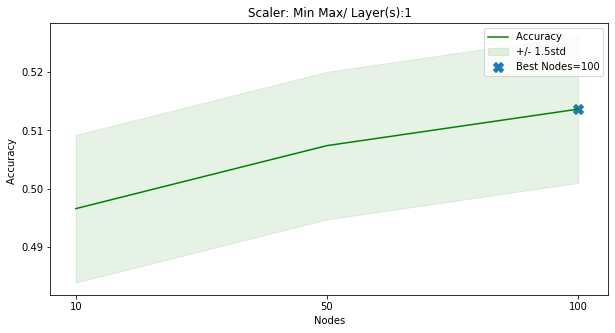

Scaler:  Standard
Layer(s):  1
Activation:  relu
The best accuracy was  0.5298 with  100  nodes and  relu  activation


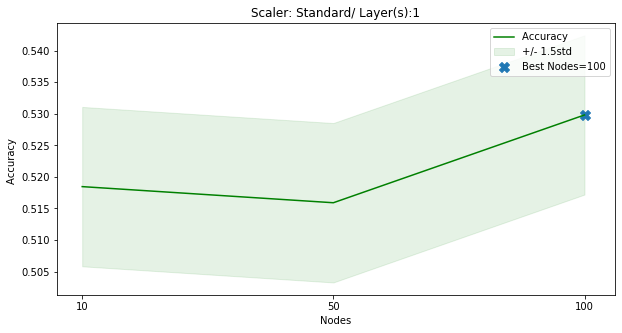

Scaler:  No
Layer(s):  2
Activation:  logistic
The best accuracy was  0.4475 with  (50, 100)  nodes and  logistic  activation


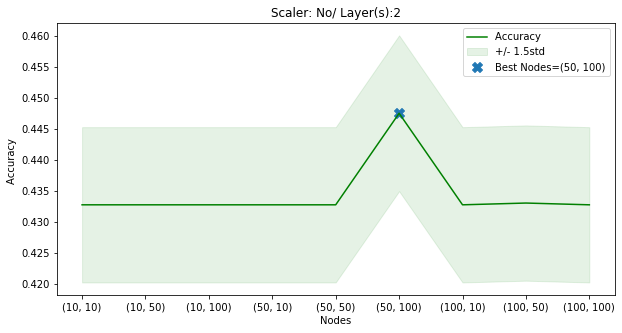

Scaler:  Min Max
Layer(s):  2
Activation:  logistic
The best accuracy was  0.5026 with  (50, 10)  nodes and  logistic  activation


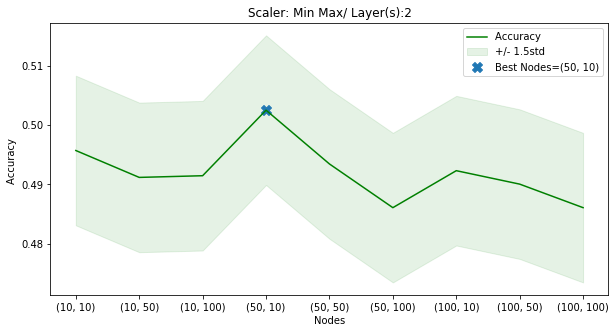

Scaler:  Standard
Layer(s):  2
Activation:  logistic
The best accuracy was  0.5372 with  (50, 10)  nodes and  logistic  activation


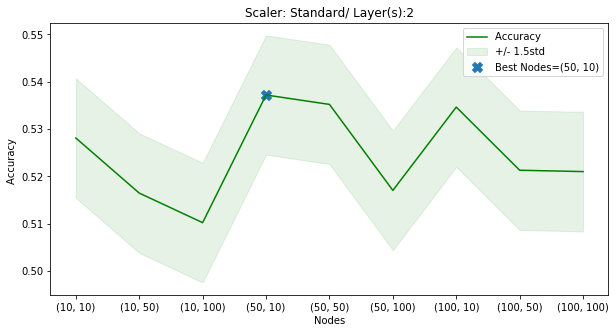

Scaler:  No
Layer(s):  2
Activation:  tanh
The best accuracy was  0.4341 with  (50, 100)  nodes and  tanh  activation


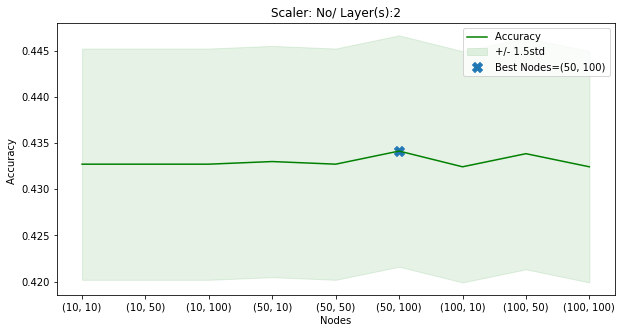

Scaler:  Min Max
Layer(s):  2
Activation:  tanh
The best accuracy was  0.5202 with  (10, 10)  nodes and  tanh  activation


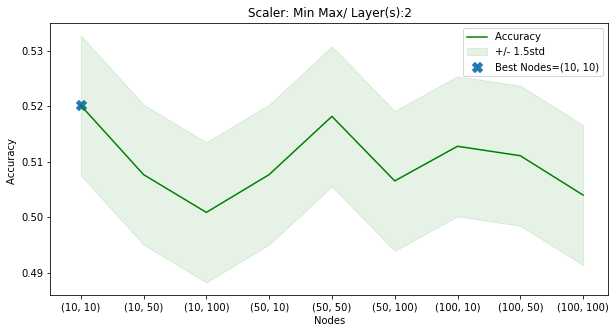

Scaler:  Standard
Layer(s):  2
Activation:  tanh
The best accuracy was  0.5375 with  (100, 100)  nodes and  tanh  activation


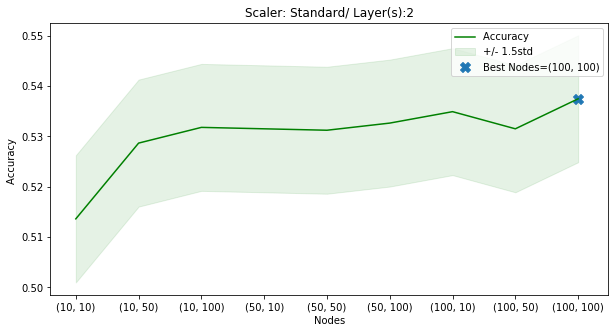

Scaler:  No
Layer(s):  2
Activation:  relu
The best accuracy was  0.4327 with  (10, 10)  nodes and  relu  activation


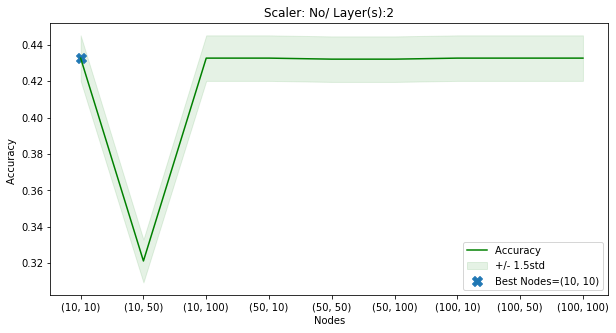

Scaler:  Min Max
Layer(s):  2
Activation:  relu
The best accuracy was  0.519 with  (50, 100)  nodes and  relu  activation


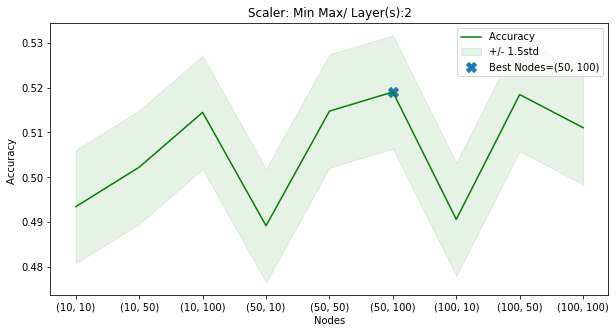

Scaler:  Standard
Layer(s):  2
Activation:  relu
The best accuracy was  0.5392 with  (50, 50)  nodes and  relu  activation


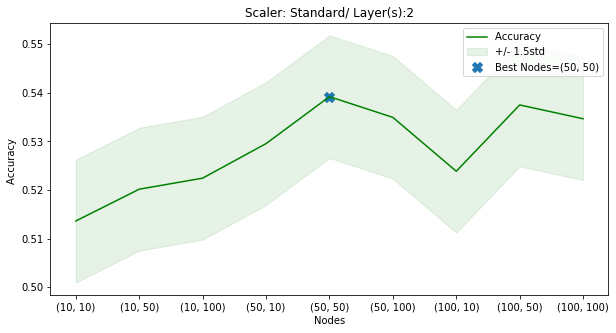

In [26]:
N=[10,50,100]
type_scaler=['No','Min Max','Standard']
Activ=['logistic', 'tanh', 'relu']

NN_Layer=[]
NN_Type=[]
NN_activation=[]
NN_Accuracy=[]

for layer in range(1,3):
    for act in Activ:
        for s in type_scaler:
            X_train_scaled, X_test_scaled=scal(s)
            mean_acc = np.zeros(len(N)**layer)
            std_acc = np.zeros(len(N)**layer)
            L=[]
            pos=[]
            con=1
            for n in range(1,len(N)+1):
                if layer==1:
                    nnclf = MLPClassifier(hidden_layer_sizes = [N[n-1]], solver='lbfgs'
                                          , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                    yhat=nnclf.predict(X_test_scaled)
                    con+=1
                    pos.append(con)
                    L.append(N[n-1])
                    mean_acc[n-1]=metrics.accuracy_score(y1_test, yhat)
                    std_acc[n-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])
                    
                if layer==2:
                    for n2 in range(1,len(N)+1):
                        nnclf = MLPClassifier(hidden_layer_sizes = [N[n-1],N[n2-1]], solver='lbfgs'
                                              , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                        yhat=nnclf.predict(X_test_scaled)
                        con+=1
                        pos.append(con)
                        L.append((N[n-1],N[n2-1]))
                        mean_acc[(n-1)*len(N)+n2-1]=metrics.accuracy_score(y1_test, yhat)
                        std_acc[(n-1)*len(N)+n2-1]=np.std(yhat==y1_test)/np.sqrt(yhat.shape[0])
                    
                    
            print('===============================================================================================')
            print('Scaler: ',s)
            print('Layer(s): ',layer)
            print('Activation: ',act)

            BestNN=MLPClassifier(hidden_layer_sizes = L[mean_acc.argmax()], solver='lbfgs'
                                          , activation=act,random_state = 0).fit(X_train_scaled, y1_train)
                
            print( "The best accuracy was ", round(mean_acc.max(),4), "with ", L[mean_acc.argmax()]
                      ,' nodes and ',act,' activation') 
                
            y1_pred = BestNN.predict(X_test_scaled)
            NN_yhat_prob = BestNN.predict_proba(X_test_scaled)
                
            #Classification Metrics
            NN_Layer.append(L[mean_acc.argmax()])
            NN_Type.append(s)
            NN_activation.append(act)
            NN_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
        
                
            f, ax = plt.subplots(figsize=(10,5))
                
            plt.plot(pos,mean_acc,'g')
            plt.fill_between(pos,mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
            plt.scatter(pos[mean_acc.argmax()],mean_acc.max(),s=100,marker="X")
            plt.legend(('Accuracy ', '+/- 1.5std',"Best Nodes="+str(L[mean_acc.argmax()])))
            plt.ylabel('Accuracy ')
            plt.xlabel('Nodes')
            plt.title('Scaler: '+s+'/ Layer(s):'+str(layer))
            ax.set_xticks(pos)
            ax.set_xticklabels(L)
            
            my_file= s+' scaler with '+act+' activation and '+str(layer)+' Layer.png'
            dir2=os.getcwd()+"/MultiLabel Models/Neural Network" 
            plt.savefig(os.path.join(dir2, my_file))
            plt.show()
                

Summary

      Nodes    Scaler Activation  Accuracy
         50        No   logistic    0.4679
         10   Min Max   logistic    0.5034
         50  Standard   logistic    0.5273
         50        No       tanh    0.4330
         10   Min Max       tanh    0.5080
         50  Standard       tanh    0.5361
         50        No       relu    0.4290
        100   Min Max       relu    0.5136
        100  Standard       relu    0.5298
  (50, 100)        No   logistic    0.4475
   (50, 10)   Min Max   logistic    0.5026
   (50, 10)  Standard   logistic    0.5372
  (50, 100)        No       tanh    0.4341
   (10, 10)   Min Max       tanh    0.5202
 (100, 100)  Standard       tanh    0.5375
   (10, 10)        No       relu    0.4327
  (50, 100)   Min Max       relu    0.5190
   (50, 50)  Standard       relu    0.5392

Best model:
Layer(s): 2 
Nodes: (50, 50) 
Activation: relu 
Scaler: Standard
r2:  0.5392
Test data: 3522


[('scaler', StandardScaler()),
 ('NN',
  MLPClassifier(hidden_layer_sizes=[50, 50], random_state=0, solver='lbfgs'))]

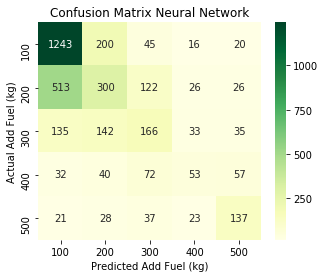

In [27]:
NN_Report=pd.DataFrame(list(zip(NN_Layer,NN_Type,NN_activation,NN_Accuracy))
                    ,columns=['Nodes','Scaler','Activation','Accuracy'])

print("Summary\n")
print(NN_Report.to_string(index=False))

Best_layer=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,0]
Best_scal=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,1]
Best_act=NN_Report[NN_Report['Accuracy']==np.max(NN_Report['Accuracy'])].iloc[0,2]

print('\nBest model:\nLayer(s):',len(Best_layer),'\nNodes:',Best_layer,'\nActivation:',Best_act,'\nScaler:',Best_scal)

X_train_scaled, X_test_scaled=scal(Best_scal)

#Best_layer[0],Best_layer[1]
if len(Best_layer)==2:
    BestNN = MLPClassifier(hidden_layer_sizes = [Best_layer[0],Best_layer[1]], solver='lbfgs', activation=Best_act,random_state = 0).fit(X_train_scaled, y1_train)
    Best= MLPClassifier(hidden_layer_sizes = [Best_layer[0],Best_layer[1]], solver='lbfgs', activation=Best_act,random_state = 0)
else:
    BestNN = MLPClassifier(hidden_layer_sizes = [Best_layer], solver='lbfgs', activation=Best_act,random_state = 0).fit(X_train_scaled, y1_train)
    Best = MLPClassifier(hidden_layer_sizes = [Best_layer], solver='lbfgs', activation=Best_act,random_state = 0)
    

y1_pred = BestNN.predict(X_test_scaled)

print("r2: ",round(metrics.accuracy_score(y1_test, y1_pred),4))

Confusion(y1_test, y1_pred,model='Neural Network')


#Save best model
clf ['Neural Network']=[]

if Best_scal!='No':
    clf['Neural Network'].append(translate_scal(Best_scal))

clf ['Neural Network'].append(('NN',Best))

clf ['Neural Network']

## Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [28]:
from sklearn.ensemble import RandomForestClassifier

Scaler:  No
Criterion: gini
The best accuracy was  0.562 with a depth of 16


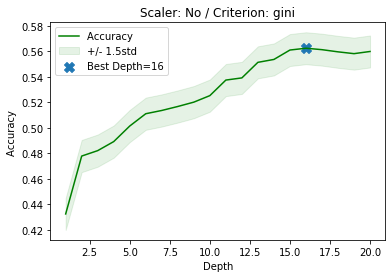

Scaler:  No
Criterion: entropy
The best accuracy was  0.566 with a depth of 14


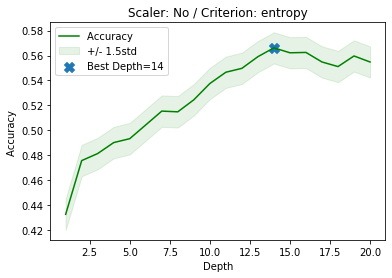

Scaler:  Min Max
Criterion: gini
The best accuracy was  0.564 with a depth of 17


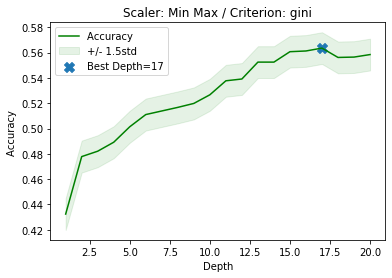

Scaler:  Min Max
Criterion: entropy
The best accuracy was  0.566 with a depth of 14


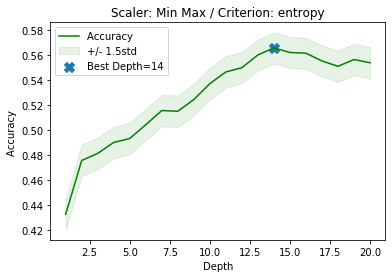

Scaler:  Standard
Criterion: gini
The best accuracy was  0.562 with a depth of 15


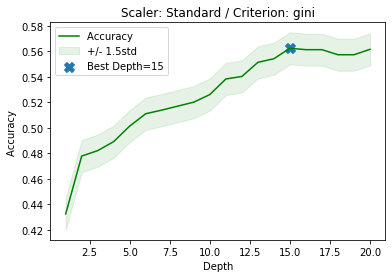

Scaler:  Standard
Criterion: entropy
The best accuracy was  0.566 with a depth of 14


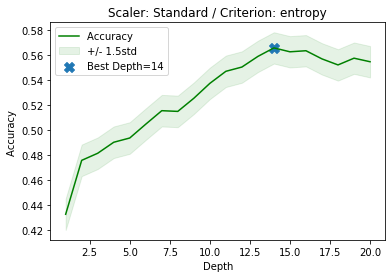

In [29]:

K=20 #Max Depth
criterion=["gini","entropy"]
type_scaler=['No','Min Max','Standard']
Forest_K=[]
Forest_Accuracy=[]
Forest_Criterion=[]

for s in type_scaler:
    for c in criterion:
        X_train_scaled, X_test_scaled=scal(s)

        mean_acc = np.zeros((K))
        std_acc = np.zeros((K))

        for n in range(1,K+1):

            Forest = RandomForestClassifier(max_depth = n, random_state=0,criterion=c).fit(X_train_scaled,y1_train)
            yhat_tree=Forest.predict(X_test_scaled)

            mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_tree)
            std_acc[n-1]=np.std(yhat_tree==y1_test)/np.sqrt(yhat_tree.shape[0])

        print('============================================================')
        print('Scaler: ',s)
        print('Criterion:',c)

        Best_Forest = RandomForestClassifier(max_depth = mean_acc.argmax()+1,random_state=0,criterion=c).fit(X_train_scaled,y1_train)

        print( "The best accuracy was ", round(mean_acc.max(),3), "with a depth of", mean_acc.argmax()+1) 

        y1_pred = Best_Forest.predict(X_test_scaled)

        #Classification Metrics
        Forest_K.append(mean_acc.argmax()+1)
        Forest_Criterion.append(c)
        Forest_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))
        
        plt.plot(range(1,K+1),mean_acc,'g')
        plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
        plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
        plt.legend(('Accuracy ', '+/- 1.5std',"Best Depth="+str(mean_acc.argmax()+1)))
        plt.ylabel('Accuracy ')
        plt.xlabel('Depth')
        plt.title('Scaler: '+s+" / Criterion: "+c)

        my_file=s+' scaler with '+c+' criterion.png'
        dir2=os.getcwd()+"/MultiLabel Models/Random Forest" 
        plt.savefig(os.path.join(dir2, my_file))
        plt.show()

Summary

   Scaler  Depth Criterion  Accuracy
       No     16      gini    0.5625
  Min Max     14   entropy    0.5662
 Standard     17      gini    0.5636

Best model with a depth 14  with  Min Max scaler using entropy as criterion
r2:  0.5659
Test data: 3522


[('scaler', MinMaxScaler()),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', max_depth=14, random_state=0))]

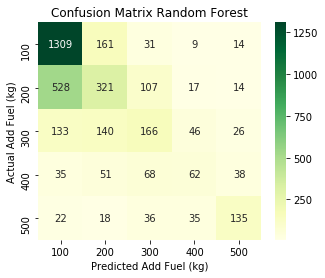

In [30]:
print("Summary\n")

Forest_Report=pd.DataFrame(list(zip(type_scaler,Forest_K,Forest_Criterion,Forest_Accuracy))
                    ,columns=['Scaler','Depth','Criterion','Accuracy'])

print(Forest_Report.to_string(index=False))

Best_Forest_scal=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,0]
Best_Forest_Depth=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,1]
Best_Forest_Criterion=Forest_Report[Forest_Report['Accuracy']==np.max(Forest_Report['Accuracy'])].iloc[0,2]

print('\nBest model with a depth',Best_Forest_Depth,' with ',Best_Forest_scal,'scaler using',Best_Forest_Criterion,'as criterion')

X_train_scaled, X_test_scaled=scal(Best_Forest_scal)

Best_Forest = RandomForestClassifier(max_depth =Best_Forest_Depth ,random_state=0,criterion=Best_Forest_Criterion).fit(X_train_scaled,y1_train)

y1_pred = Best_Forest.predict(X_test_scaled)

print("r2: ",round(metrics.accuracy_score(y1_test, y1_pred),4))

Confusion(y1_test, y1_pred,model='Random Forest')

#Save best model
clf ['Random Forest']=[]

if Best_Forest_scal!='No':
    clf['Random Forest'].append(translate_scal(Best_Forest_scal))

clf ['Random Forest'].append(('Random Forest',RandomForestClassifier(max_depth=Best_Forest_Depth ,random_state=0,criterion=Best_Forest_Criterion)))

clf ['Random Forest']

## Gradient Boosting Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

Scaler:  No
The best accuracy was  0.572 with a depth of 7


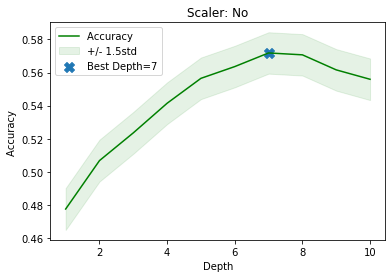

Scaler:  Min Max
The best accuracy was  0.572 with a depth of 7


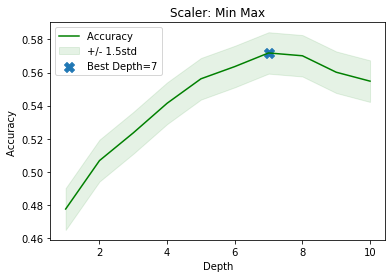

Scaler:  Standard
The best accuracy was  0.572 with a depth of 7


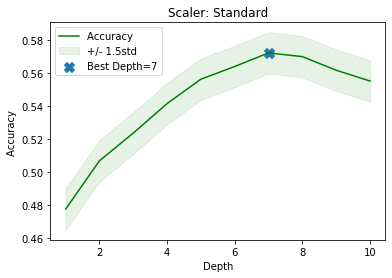

In [32]:
K=10 #Max Depth
type_scaler=['No','Min Max','Standard']

Gradient_K=[]
Gradient_Accuracy=[]

for s in type_scaler:

    X_train_scaled, X_test_scaled=scal(s)

    mean_acc = np.zeros((K))
    std_acc = np.zeros((K))

    for n in range(1,K+1):

        Gradient = GradientBoostingClassifier(max_depth = n, random_state=0).fit(X_train_scaled,y1_train)
        yhat_tree=Gradient.predict(X_test_scaled)

        mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat_tree)
        std_acc[n-1]=np.std(yhat_tree==y1_test)/np.sqrt(yhat_tree.shape[0])

    print('============================================================')
    print('Scaler: ',s)

    Best_Gradient = GradientBoostingClassifier(max_depth = n, random_state=0).fit(X_train_scaled,y1_train)

    print( "The best accuracy was ", round(mean_acc.max(),3), "with a depth of", mean_acc.argmax()+1) 

    y1_pred = Best_Gradient.predict(X_test_scaled)

    #Classification Metrics
    Gradient_K.append(mean_acc.argmax()+1)
    Gradient_Accuracy.append(round(metrics.accuracy_score(y1_test, y1_pred),4))

    plt.plot(range(1,K+1),mean_acc,'g')
    plt.fill_between(range(1,K+1),mean_acc - 1.5 * std_acc,mean_acc + 1.5 * std_acc, alpha=0.10,color="g")
    plt.scatter(mean_acc.argmax()+1,mean_acc.max(),s=100,marker="X")
    plt.legend(('Accuracy ', '+/- 1.5std',"Best Depth="+str(mean_acc.argmax()+1)))
    plt.ylabel('Accuracy ')
    plt.xlabel('Depth')
    plt.title('Scaler: '+s)
    
    my_file=s+' scaler.png'
    dir2=os.getcwd()+"/MultiLabel Models/Gradient Boosting" 
    plt.savefig(os.path.join(dir2, my_file))
    
    plt.show()



Summary

   Scaler  Depth  Accuracy
       No      7    0.5559
  Min Max      7    0.5548
 Standard      7    0.5551

Best model with a depth 7  with  No scaler
r2:  0.5718
Test data: 3522


[('Gradient Boosting',
  GradientBoostingClassifier(max_depth=7, random_state=0))]

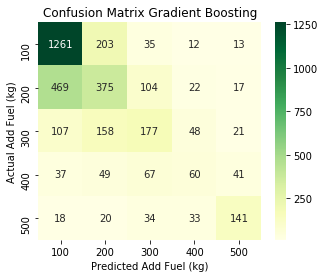

In [33]:
print("Summary\n")

Gradient_Report=pd.DataFrame(list(zip(type_scaler,Gradient_K,Gradient_Accuracy))
                    ,columns=['Scaler','Depth','Accuracy'])

print(Gradient_Report.to_string(index=False))

Best_Gradient_scal=Gradient_Report[Gradient_Report['Accuracy']==np.max(Gradient_Report['Accuracy'])].iloc[0,0]
Best_Gradient_Depth=Gradient_Report[Gradient_Report['Accuracy']==np.max(Gradient_Report['Accuracy'])].iloc[0,1]


print('\nBest model with a depth',Best_Gradient_Depth,' with ',Best_Gradient_scal,'scaler')

X_train_scaled, X_test_scaled=scal(Best_Gradient_scal)

Best_Gradient = GradientBoostingClassifier(max_depth =Best_Gradient_Depth, random_state=0).fit(X_train_scaled,y1_train)

y1_pred = Best_Gradient.predict(X_test_scaled)

print("r2: ",round(metrics.accuracy_score(y1_test, y1_pred),4))

Confusion(y1_test, y1_pred,model='Gradient Boosting')

#Save best model
clf ['Gradient Boosting']=[]

if Best_Gradient_scal!='No':
    clf['Gradient Boosting'].append(translate_scal(Best_Gradient_scal))

clf ['Gradient Boosting'].append(('Gradient Boosting',GradientBoostingClassifier(max_depth =Best_Gradient_Depth, random_state=0)))

clf ['Gradient Boosting']


## Best Classifiers + Cross Validation

Pipelines: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html

Scoring Parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,jaccard_score,roc_auc_score

In [35]:
clf

{'Neural Network': [('scaler', StandardScaler()),
  ('NN',
   MLPClassifier(hidden_layer_sizes=[50, 50], random_state=0, solver='lbfgs'))],
 'Random Forest': [('scaler', MinMaxScaler()),
  ('Random Forest',
   RandomForestClassifier(criterion='entropy', max_depth=14, random_state=0))],
 'Gradient Boosting': [('Gradient Boosting',
   GradientBoostingClassifier(max_depth=7, random_state=0))]}

In [36]:
cv_models=pd.DataFrame({'Model' : [],'Accuracy':[],'Fit Time':[],'Score Time':[],'Total Time':[]})

scoring = ['accuracy']

KFold=30

for i in clf:
    df=pd.DataFrame(cross_validate(Pipeline(clf[i]),X,y1,cv=KFold,scoring=scoring))
    df.rename(columns={'test_accuracy':'Accuracy','fit_time':'Fit Time','score_time':'Score Time'},inplace=True)
    df['Model']=i
    df['Total Time']=df['Fit Time']+df['Score Time']
    cv_models=pd.concat([cv_models,df])
    print(i,'OK')

cv_models=cv_models.round(2)

Neural Network OK
Random Forest OK
Gradient Boosting OK


In [37]:
cv_models

,Model,Accuracy,Fit Time,Score Time,Total Time
0,Neural Network,0.51,14.81,0.00,14.82
1,Neural Network,0.53,14.84,0.00,14.84
2,Neural Network,0.55,14.94,0.00,14.94
3,Neural Network,0.53,14.21,0.00,14.21
4,Neural Network,0.54,13.96,0.00,13.97
...,...,...,...,...,...
25,Gradient Boosting,0.64,35.55,0.02,35.56
26,Gradient Boosting,0.61,33.49,0.02,33.51
27,Gradient Boosting,0.59,28.35,0.01,28.36
28,Gradient Boosting,0.57,28.35,0.01,28.36


Classification metrics: https://www.youtube.com/watch?v=fqfYGrkj3bo

In [38]:
summ_clf=cv_models.groupby('Model')['Accuracy','Total Time'].agg([np.average,np.std]).round(2)
summ_clf=summ_clf.sort_values(by=[('Accuracy', 'average')],ascending= False)
summ_clf

Accuracy       Total Time      
                   average   std    average   std
Model                                            
Gradient Boosting     0.55  0.03      28.41  2.14
Random Forest         0.55  0.03       1.89  0.09
Neural Network        0.53  0.04      13.63  0.71

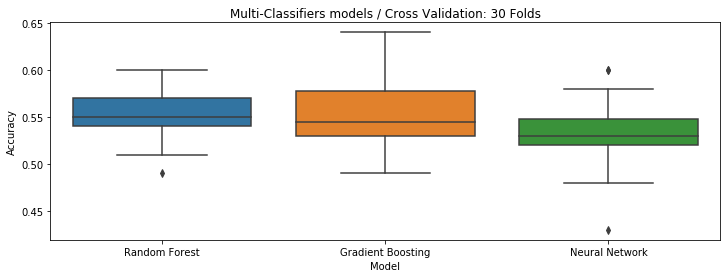

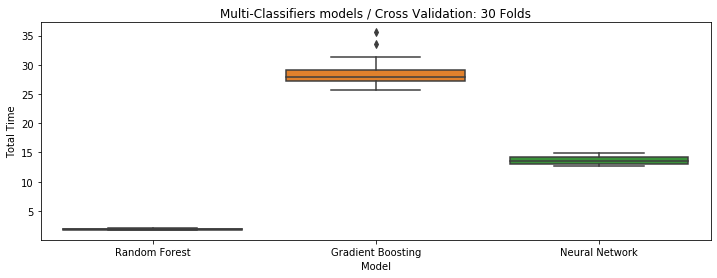

In [39]:
sorted_index=cv_models.groupby('Model')['Accuracy'].mean().sort_values(ascending= False).index

for i in ['Accuracy','Total Time']:
    ax=plt.figure(figsize=(12,4))
    ax=sns.boxplot(cv_models['Model'],cv_models[i],order=sorted_index)
    plt.title('Multi-Classifiers models / Cross Validation: '+str(KFold)+' Folds')
    
    my_file=i+' with '+str(KFold)+' Folds.png'
    dir2=os.getcwd()+"/MultiLabel Models/0. Metrics" 
    plt.savefig(os.path.join(dir2, my_file))

In [40]:
Top_Models=summ_clf.index[0:3]


In [41]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
print ('Train set:', X_train.shape,  y1_train.shape)
print ('Test set:', X_test.shape,  y1_test.shape)

Train set: (10566, 28) (10566,)
Test set: (3522, 28) (3522,)


In [42]:
Best=Pipeline(clf.get('Random Forest')).fit(X,y1) # X y y1 y evitar partir en 2

In [43]:
yhat = Best.predict(X)

In [44]:
round(metrics.accuracy_score(y1, yhat),2)

0.84

Test data: 14088


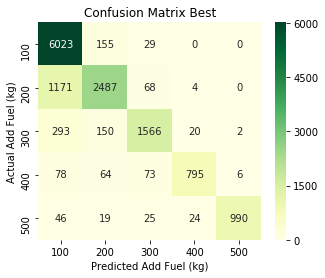

In [45]:
Confusion(y1, yhat,model='Best',save=False)

In [46]:
import joblib 

In [47]:
joblib.dump(Best.fit(X,y1), 'Prediction_Model.pkl')

['Prediction_Model.pkl']

In [48]:
d={"Actual":y1,"Predicted":yhat}
df=pd.DataFrame(d)
np.std(df['Actual']-df['Predicted'])

56.86785506699411